In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns

In [27]:
# Load data train
train = pd.read_csv('dataset/train-data.csv')
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [28]:
Company = train['Name']
Company.to_csv('dataset/company.csv')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [30]:
# Count value = NULL
print(train[train.isna() == True].count())

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64


In [31]:
train['Name'].value_counts()

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64

In [32]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


# Clean Data and Remove outliers

In [33]:
train = train.drop(["Unnamed: 0", "New_Price"], axis = 1)
train = train.dropna()
train = train.reset_index()
#The length of the dataset after dropping null values
print("The length of the dataset after dropping null values is", str(len(train)), "rows.")

The length of the dataset after dropping null values is 5975 rows.


## Cleaning data within each columns

In [34]:
# 'Mileage'	'Engine'	'Power'
train['Mileage'] = train['Mileage'].str.split(expand=True)[0].astype(float)
train['Engine'] = train['Engine'].str.split(expand=True)[0].astype(float)

In [35]:
# train['Power'] = train['Power'].str.split(expand=True)[0].astype(float)
(train['Power'] == 'null bhp').sum()

103

In [36]:
train['Power'] = train['Power'].replace('null bhp', None)
train['Power'] = train['Power'].str.split(expand=True)[0].astype(float)

In [37]:
# rename columns
train = train.rename(columns = {
    'Mileage':'Mileage_kmpl',
    'Engine':'Engine_CC',
    'Power':'Power_bhp'
})

In [38]:
train.describe()

,index,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
count,5975.00000,5975.000000,5.975000e+03,5975.000000,5975.000000,5872.000000,5975.000000,5975.000000
mean,3008.80887,2013.386778,5.867431e+04,18.179408,1621.606695,113.276894,5.278828,9.501647
std,1739.30056,3.247238,9.155851e+04,4.521801,601.036987,53.881892,0.808959,11.205736
min,0.00000,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,0.000000,0.440000
25%,1502.50000,2012.000000,3.390800e+04,15.200000,1198.000000,75.000000,5.000000,3.500000
50%,3010.00000,2014.000000,5.300000e+04,18.160000,1493.000000,97.700000,5.000000,5.650000
75%,4514.50000,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,6018.00000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [39]:
print(train.info())
print(train[train.isna()==True].count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage_kmpl       5975 non-null   float64
 9   Engine_CC          5975 non-null   float64
 10  Power_bhp          5872 non-null   float64
 11  Seats              5975 non-null   float64
 12  Price              5975 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 607.0+ KB
None
index                0
Name                 0
Location             0
Year                 0
Kilometers_D

In [40]:
print("Data get from",train["Year"].min(), "to", train["Year"].max())

Data get from 1998 to 2019


## Remove outliers using IQR method
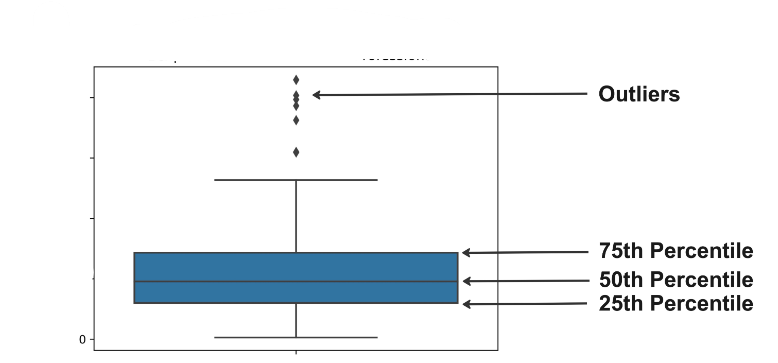

In [41]:
def remove_outlier_IQR(data, col):
  df_res = pd.DataFrame()
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  df_res=data[~((data[col]<(Q1-1.5*IQR)) | (data[col]>(Q3+1.5*IQR)))]
  return df_res

In [42]:
cols_to_remove_outliers = ['Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC',
                              'Power_bhp', 'Seats', 'Price']
for col in cols_to_remove_outliers:
    train1 = remove_outlier_IQR(train, col)

In [43]:
print("The length of the dataset is", str(len(train1)), "rows.")

The length of the dataset is 5259 rows.


## Xu ly den du lieu dang text

In [45]:
train1['Company'] = train1['Name'].str.split(expand=True)[0].str.lower()
train1['Model'] = train1['Name'].str.split().str[:2].str.join(' ').str.lower()

/tmp/ipykernel_1257/772017884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Company'] = train1['Name'].str.split(expand=True)[0].str.lower()
/tmp/ipykernel_1257/772017884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Model'] = train1['Name'].str.split().str[:2].str.join(' ').str.lower()


In [46]:
train2 = train1.loc[:, train1.columns != 'Name']  

In [52]:
train2['Company'].nunique() , train2['Model'].nunique()

(28, 182)

### Univariate Analysis

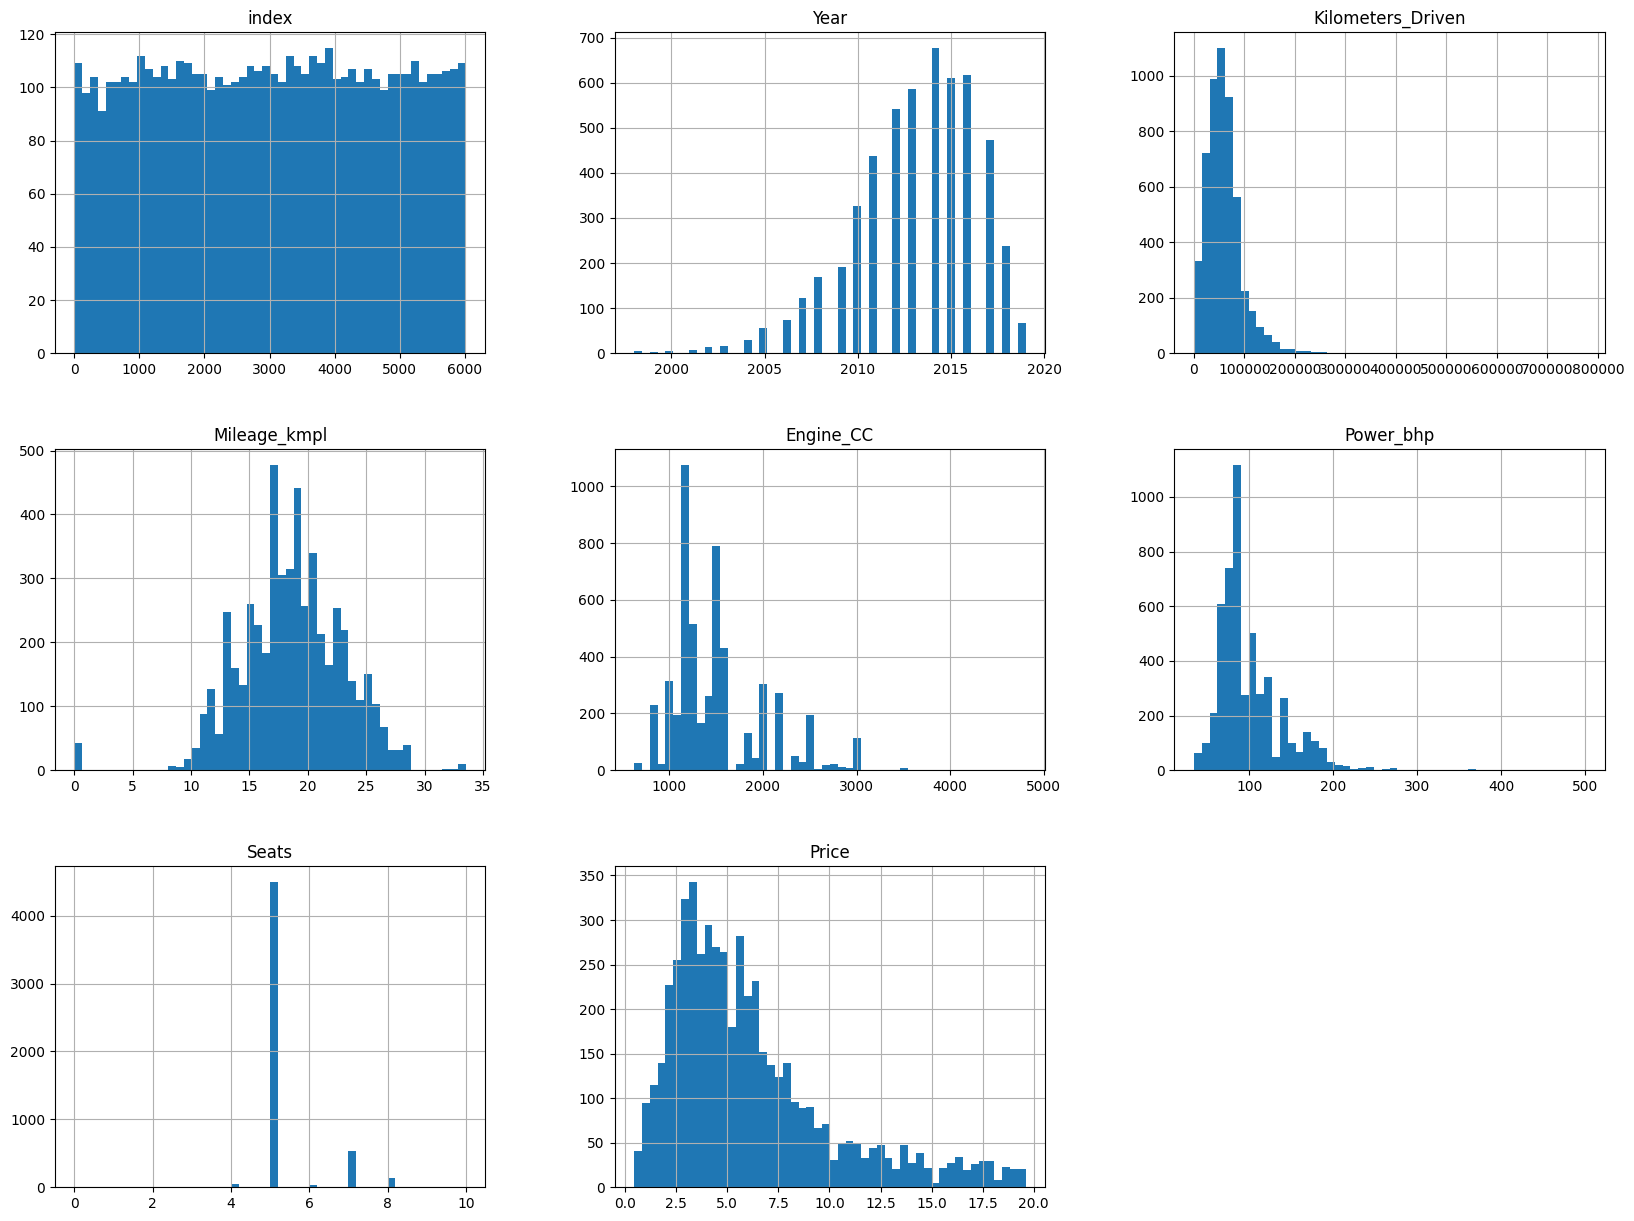

In [53]:
%matplotlib inline
train2.hist(bins=50, figsize=(20, 15))
plt.show()

Text(0.5, 1.0, 'Distribution of Company Column')

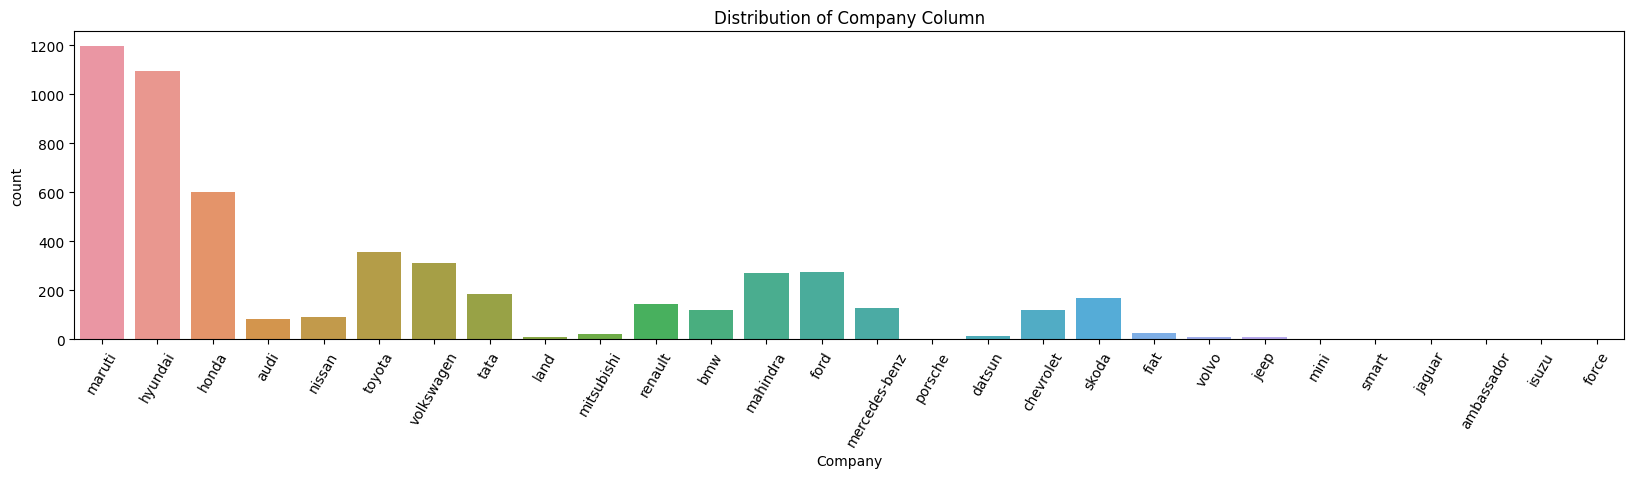

In [54]:
import seaborn as sns
plt.figure(figsize=(20,4))
sns.countplot(train2,x='Company')
plt.xticks(rotation=60)
plt.title('Distribution of Company Column')

Text(0.5, 1.0, 'Distribution of Model Column')

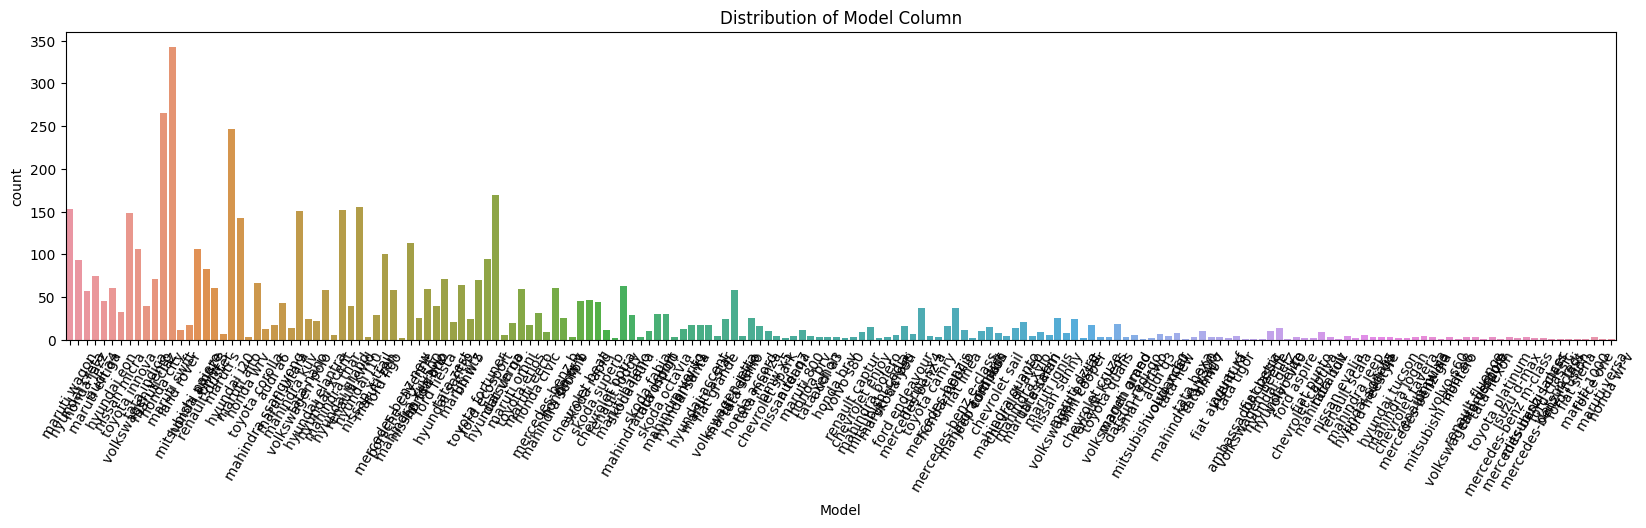

In [55]:
plt.figure(figsize=(20,4))
sns.countplot(train2,x='Model')
plt.xticks(rotation=60)
plt.title('Distribution of Model Column')

Text(0.5, 1.0, 'Distribution of Seats')

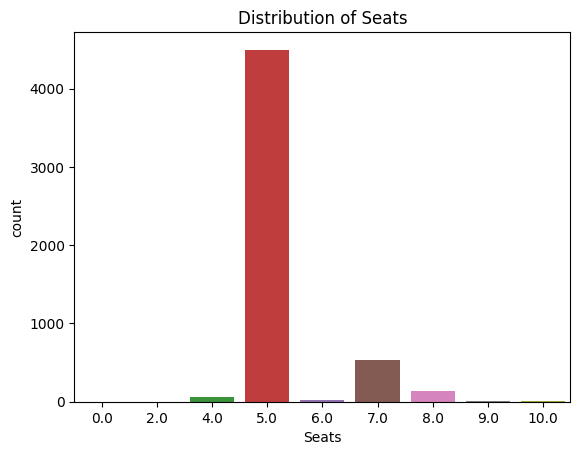

In [56]:
sns.countplot(train2,x='Seats')
plt.title('Distribution of Seats')

In [57]:
train2 = train2[train2['Seats'] == 5]

array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='Year', ylabel='Price'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Price'>,
        <Axes: xlabel='Mileage_kmpl', ylabel='Price'>,
        <Axes: xlabel='Engine_CC', ylabel='Price'>,
        <Axes: xlabel='Power_bhp', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='Year'>,
        <Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Year'>,
        <Axes: xlabel='Mileage_kmpl', ylabel='Year'>,
        <Axes: xlabel='Engine_CC', ylabel='Year'>,
        <Axes: xlabel='Power_bhp', ylabel='Year'>],
       [<Axes: xlabel='Price', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Year', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Mileage_kmpl', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Engine_CC', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Power_bhp', ylabel='Kilometers_

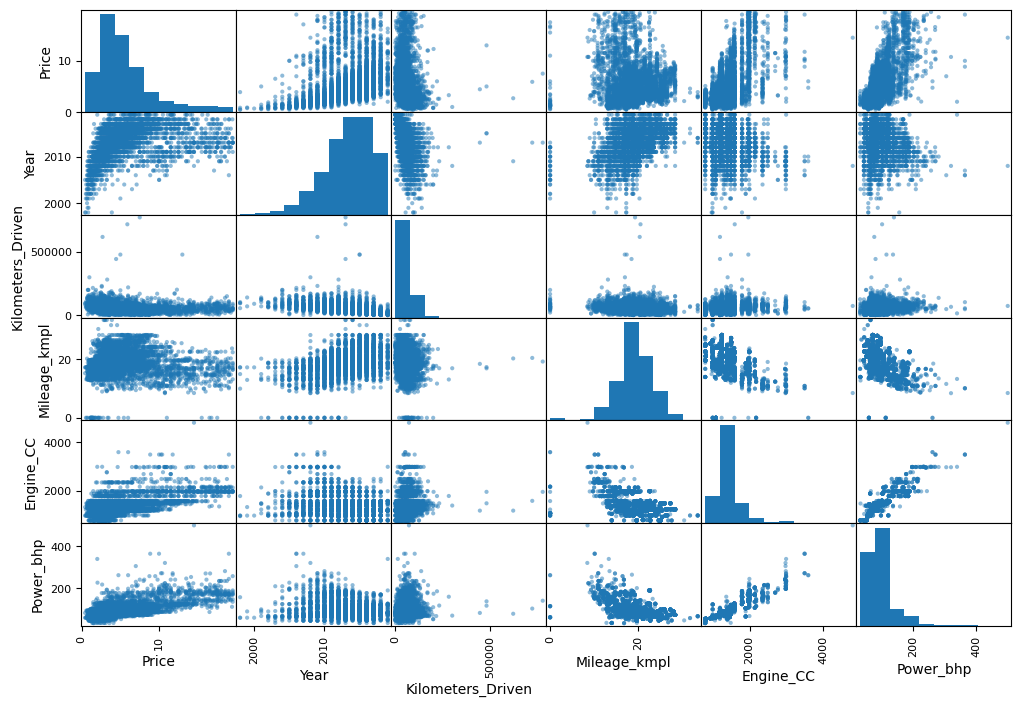

In [58]:
from pandas.plotting import scatter_matrix
attributes = ['Price','Year', 'Kilometers_Driven', 'Fuel_Type',
  'Transmission', 'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp',
  'Company', 'Model']
scatter_matrix(train2[attributes], figsize=(12, 8))

In [59]:
attributes = ['Price','Year', 'Kilometers_Driven'
              , 'Mileage_kmpl', 'Engine_CC', 'Power_bhp']

In [66]:
corr_matrix = train2[attributes].corr()
corr_matrix['Price'].sort_values(ascending=False)

Price                1.000000
Power_bhp            0.662582
Engine_CC            0.575229
Year                 0.367918
Mileage_kmpl        -0.114242
Kilometers_Driven   -0.136951
Name: Price, dtype: float64

In [97]:
input = X[:1]
input.to_csv('dataset/input.csv', index=True)

In [67]:
# Create dummies for categorical columns
dummy_Model   = pd.get_dummies(train2.Model, prefix="Model")
dummy_Company = pd.get_dummies(train2.Company, prefix="Company")
train2 = pd.concat([train2, dummy_Company, dummy_Model], axis=1)
train3 = train2.drop(['index', 'Location', 'Fuel_Type', 'Transmission', 'Company', 'Model'], axis = 1)
train3.head()

,Year,Kilometers_Driven,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_ambassador,Company_audi,...,Model_volkswagen ameo,Model_volkswagen crosspolo,Model_volkswagen jetta,Model_volkswagen passat,Model_volkswagen polo,Model_volkswagen vento,Model_volvo s60,Model_volvo s80,Model_volvo v40,Model_volvo xc60
0,2010,72000,First,26.60,998.0,58.16,5.0,1.75,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,46000,First,18.20,1199.0,88.70,5.0,4.50,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,False,True,...,False,False,False,False,False,False,False,False,False,False
5,2012,75000,First,21.10,814.0,55.20,5.0,2.35,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
from sklearn.model_selection import train_test_split,GridSearchCV ,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor

In [69]:
X = train3.drop(['Price','Kilometers_Driven', 'Owner_Type', 'Mileage_kmpl'],axis='columns')
y = train3.Price
print(X.isnull().sum().sum())

93


In [70]:
X.fillna(X.mean(), inplace=True)
print(X.isnull().sum().sum())

0


In [71]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
# Evaluation
from sklearn.model_selection import cross_val_score
def Eval(model, datas, labels):
  scores = cross_val_score(model, datas, labels, scoring="neg_mean_squared_error", cv=10)
  # displey
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

## Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [74]:
somedatas = X_train.iloc[:5]
somelabels = y_train.iloc[:5]
print("Predictions: ", lr.predict(somedatas))
print("Label:", list(somelabels))

Predictions:  [6.54808807 2.66204834 6.24339294 3.62301254 4.90265656]
Label: [5.4, 3.45, 5.55, 3.5, 3.0]


In [75]:
from sklearn.metrics import mean_squared_error
y_predict_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_predict_lr)
lr_rmse = np.sqrt(lr_mse)
print(lr_rmse)

1.400376701810379


In [76]:
Eval(lr, X_test, y_test)

Scores: [-2.33036879e+16 -4.72660249e+15 -9.12098680e+16 -6.07611976e+16
 -7.97884139e+14 -1.01311466e+17 -7.65569718e+13 -2.95053297e+17
 -3.31020865e+16 -8.37991162e+16]
Mean: -6.941417629456881e+16
Standard deviation: 8.356580100494176e+16


# Lasso CV

In [77]:
# from sklearn.metrics.pairwise import normalize
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Define a range of alpha values to search
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

# Create a LassoCV model with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=10)  

# Fit the model to the training data
lasso_cv.fit(X_train, y_train)

/home/hason03/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.5950631041178, tolerance: 4.473154809354739
  model = cd_fast.enet_coordinate_descent_gram(
/home/hason03/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.841592805539, tolerance: 4.473154809354739
  model = cd_fast.enet_coordinate_descent_gram(
/home/hason03/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 161.34025321265926, tolerance: 4.473154809354739
  model = cd_fast.enet_coordinate_descent_gram(
/home/hason03/.local/lib/python3.8/site-packages/sklearn/linear_model/_coord

LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0], cv=10)

In [78]:
# Get the best alpha value
best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

test_score = lasso_cv.score(X_test, y_test)
print("Test score (R-squared):", test_score)

Best alpha: 0.001
Test score (R-squared): 0.8201575630411128


In [79]:
y_predict_lsCV = lasso_cv.predict(X_test[:5])
print(y_predict_lsCV)
print(y_test[:5])

[12.21181807  1.28958521  3.83519918  4.88027776  5.49740021]
3882    12.50
2104     2.15
84       3.11
58       7.75
1679     5.39
Name: Price, dtype: float64


## DecisionTreeRegressor

In [348]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [349]:
y_predict_DTR = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_predict_DTR)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

1.481471335694633


In [350]:
Eval(tree_reg, X_test, y_test)

Scores: [-1.27966081 -3.1324566  -3.91853402 -1.41103616 -3.00822813 -6.96349698
 -6.58002867 -5.04958714 -5.71750803 -3.75653986]
Mean: -4.081707638328295
Standard deviation: 1.87959302839686


## Random Forest Regressor

In [351]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

Eval(forest_reg, X_test, y_test)

Scores: [-1.01248547 -2.08299068 -2.66929469 -1.16442757 -2.35227066 -4.54854752
 -3.07313794 -3.6660934  -2.428346   -2.09861501]
Mean: -2.5096208965584985
Standard deviation: 1.0134575018274612


In [352]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2, 4, 6, 8]},
     {'bootstrap':[False], 'n_estimators':[3, 10],'max_features':[2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [353]:
best_score = -grid_search.best_score_
print(best_score)

1.6699486829846173


In [354]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [355]:
forest_reg = RandomForestRegressor(max_features=8, n_estimators=30)
forest_reg.fit(X_train, y_train)

Eval(forest_reg, X_test, y_test)

Scores: [-1.62663716 -1.60705893 -2.01059131 -1.74962182 -2.08342827 -2.97730262
 -4.01220143 -2.4609318  -2.940269   -3.24170798]
Mean: -2.470975031711828
Standard deviation: 0.7607803232788775


# Save model

In [356]:
mkdir checkpoint

mkdir: cannot create directory ‘checkpoint’: File exists


In [81]:
import joblib
model = lr
checkpoint_path = "checkpoint/LassoCV.ckpt"
joblib.dump(model, checkpoint_path)

['checkpoint/LassoCV.ckpt']

In [409]:
model = lr
checkpoint_path = "checkpoint/LinearRegressor.ckpt"
joblib.dump(model, checkpoint_path)

['checkpoint/LinearRegressor.ckpt']

In [359]:
import joblib

model = lr
checkpoint_path = "checkpoint/LinearRegressor.ckpt"
joblib.dump(model, checkpoint_path)

model = tree_reg
checkpoint_path = "checkpoint/DecisionTreeRegressor.ckpt"
joblib.dump(model, checkpoint_path)


model = forest_reg
checkpoint_path = "checkpoint/RandomforestRegressor.ckpt"
joblib.dump(model, checkpoint_path)

# Tải mô hình Linear Regression từ checkpoint
# loaded_model = joblib.load(checkpoint_path)

['checkpoint/RandomforestRegressor.ckpt']

# Predict

In [82]:
sample = X[:60]
model = joblib.load('checkpoint/LassoCV.ckpt')

In [83]:
print(model.predict(X_train[10:25]))
print(y_train.iloc[10:25])

[ 2.92403412  3.71119308  4.44376755  8.76002884  8.07038879  4.87439346
  3.62301254 10.52698517 12.02706909 11.41108704  3.75348663  2.5347023
  5.14990234  6.52220917  8.36275482]
2240     2.35
4144     3.20
5220     3.98
3747     9.18
1205    11.60
687      3.95
5827     3.71
3628    16.00
5427    11.50
5452    12.65
343      3.45
4683     2.50
4270     4.89
1092     6.01
1231     6.30
Name: Price, dtype: float64
